# Testing Mistral OCR

In [1]:
!pip install -q mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 6.1 MB/s eta 0:00:00


In [ ]:
import os
import re
import base64
import requests
from mistralai import Mistral
from google.colab import userdata
from IPython.display import display, Markdown
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [3]:
mistral_api_key = userdata.get('MISTRAL_API_KEY')

client = Mistral(api_key=mistral_api_key)

## Image OCR

In [52]:
# Path to your image
image_path = "/content/course note low quality.png"

In [53]:
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0) # gaussian blur to reduce noise.
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2) #adaptive thresholding
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1) #morphological opening
    inverted = cv2.bitwise_not(opening)
    return inverted

<Figure size 1500x2000 with 0 Axes>

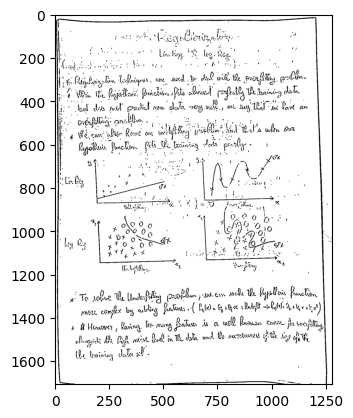

<Figure size 1500x2000 with 0 Axes>

In [54]:
image = cv2.imread(image_path)
preprocessed_image = preprocess_image(image)
plt.imshow(preprocessed_image, cmap='gray')
plt.figure(figsize=(15,20))

In [55]:
def encode_image(image_path, preprocess=False):
    """Encode the preprocessed image to base64."""
    try:
        if preprocess:
          # Load the image using OpenCV
          image = cv2.imread(image_path)
          if image is None:
              raise FileNotFoundError(f"Could not read image from {image_path}") #more specific error message.

          # Preprocess the image
          preprocessed_image = preprocess_image(image)

          # Encode the preprocessed image
          _, buffer = cv2.imencode('.png', preprocessed_image) # Use png for lossless encoding
          return base64.b64encode(buffer).decode('utf-8')
        else:
          with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

    except FileNotFoundError as e:
        print(f"Error: {e}")
        return None
    except Exception as e:
        print(f"Error: {e}")
        return None

In [56]:
# Getting the base64 string
base64_image = encode_image(image_path, preprocess=False)

In [57]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{base64_image}"
    },
    include_image_base64=True
)

In [58]:
images = ocr_response.pages[0].images

In [ ]:
md = ocr_response.pages[0].markdown

for image in images:
    pattern = rf'\({re.escape(image.id)}\)'
    md = re.sub(pattern, f'({image.image_base64})', md)

print(md)

Regultarigation
Liv. Reg. \& Leg. Reg.
Regultangation techniques are used to deal with the overfitting problem.
When the Repetitions function fots almost perfectly the training data but does not predict new data very well, we say that we have an overfitting problem.
We can also have an undefitting problem, and that's when our Repotheis function fots the training data poorly.
![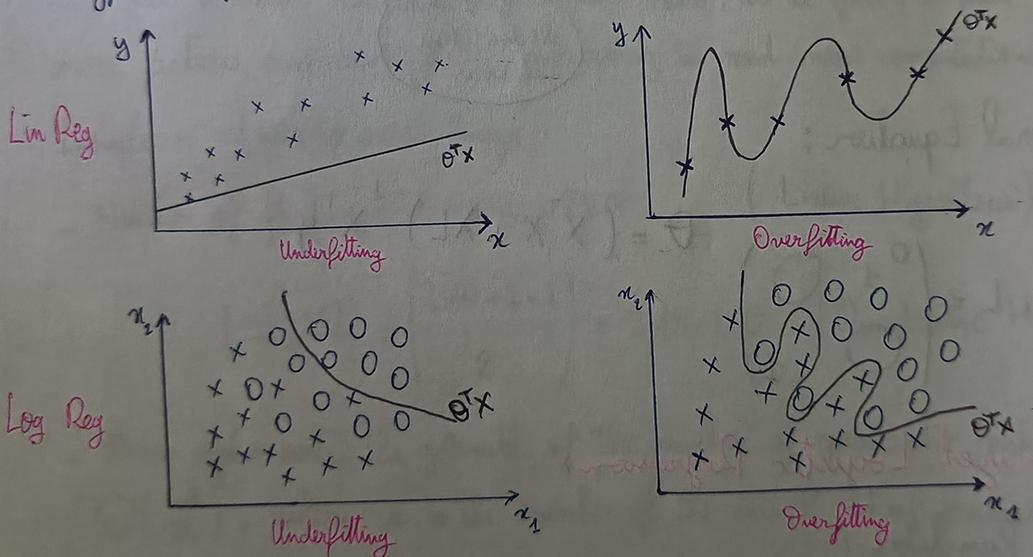](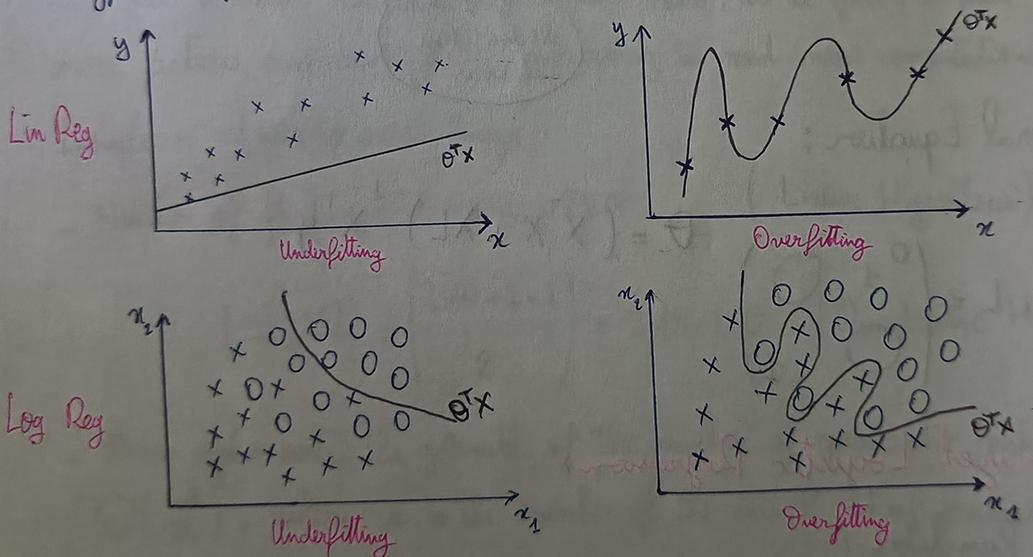)
$\therefore$ To solve the Undefitting problem, we can make the Repotheis function more complex by adding features. $\left(R_{1}(x)=R_{2}+R_{3} x\right.$ : $\left.\left.\operatorname{Untoft} \rightarrow R_{1}(x)=R_{2}+R_{3} x+R_{4}\right)\right)$
$\therefore$ However, having too many features is a well known cause for overfitting alongside the Reg. noise level in the data and the nontrueness of the size of the the training data self.

In [60]:
display(Markdown(md))

## File OCR

In [62]:
uploaded_pdf = client.files.upload(
    file={
        "file_name": "uploaded_file.pdf",
        "content": open("/content/Demo paper.pdf", "rb"),
    },
    purpose="ocr"
)

In [63]:
client.files.retrieve(file_id=uploaded_pdf.id)

RetrieveFileOut(id='11528ea0-c526-4a9f-91d9-1d8afd9ccccb', object='file', size_bytes=1616045, created_at=1741335550, filename='uploaded_file.pdf', purpose='ocr', sample_type='ocr_input', source='upload', deleted=False, num_lines=None)

In [64]:
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

In [73]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    },
    include_image_base64=True
)

<ipython-input-76-7e98b39876c9>:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  ocr_response.dict()


{'pages': [{'index': 0,
   'markdown': '# Pixtral 12B \n\n![img-0.jpeg](img-0.jpeg)\n\nWe introduce Pixtral 12B, a 12-billion-parameter multimodal language model. Pixtral 12B is trained to understand both natural images and documents, achieving leading performance on various multimodal benchmarks, surpassing a number of larger models. Unlike many open-source models, Pixtral is also a cutting-edge text model for its size, and does not compromise on natural language performance to excel in multimodal tasks. Pixtral uses a new vision encoder trained from scratch, which allows it to ingest images at their natural resolution and aspect ratio. This gives users flexibility on the number of tokens used to process an image. Pixtral is also able to process any number of images in its long context window of 128 K tokens. Pixtral 12B substanially outperforms other open models of similar sizes (Llama-3.2 11B \\& Qwen-2-VL 7B). It also outperforms much larger open models like Llama-3.2 90B while bei
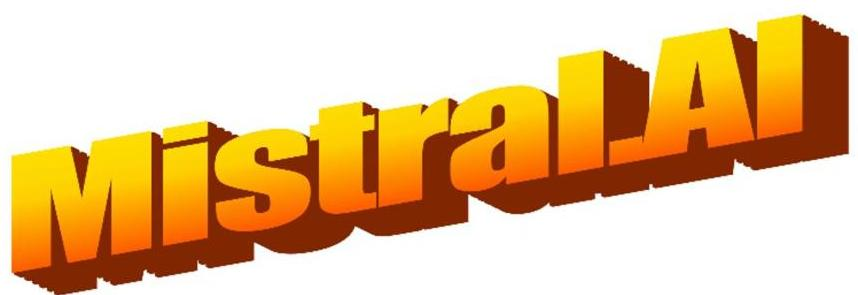
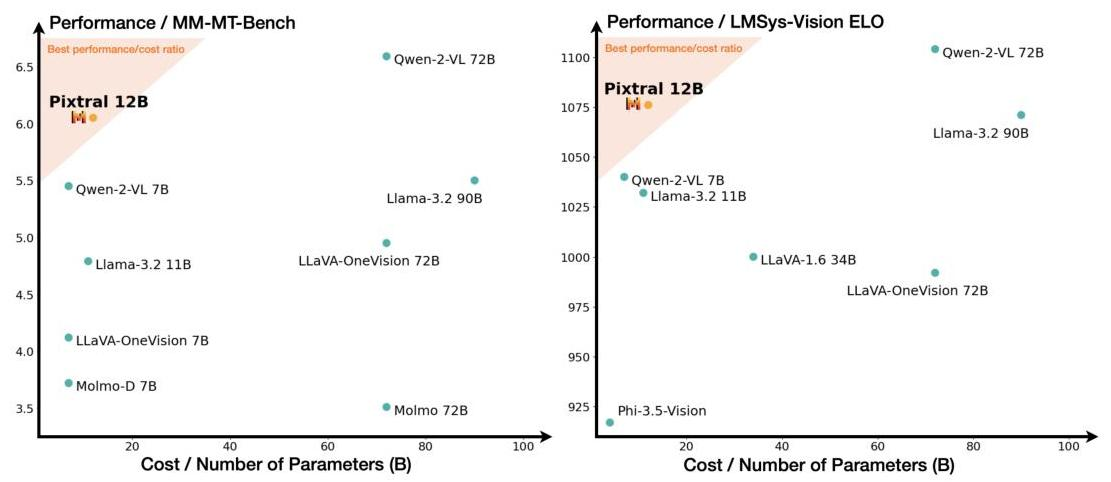
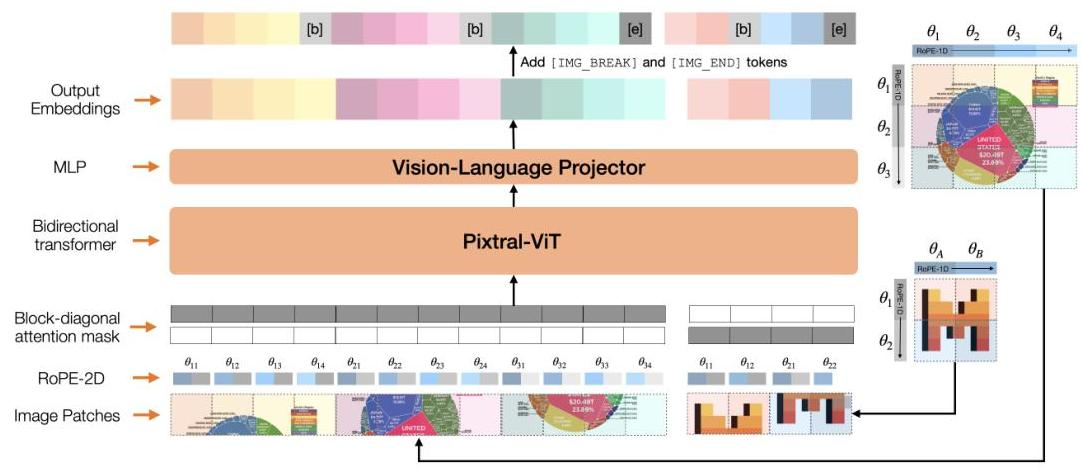

In [76]:
ocr_response.dict()

# Pixtral 12B 

![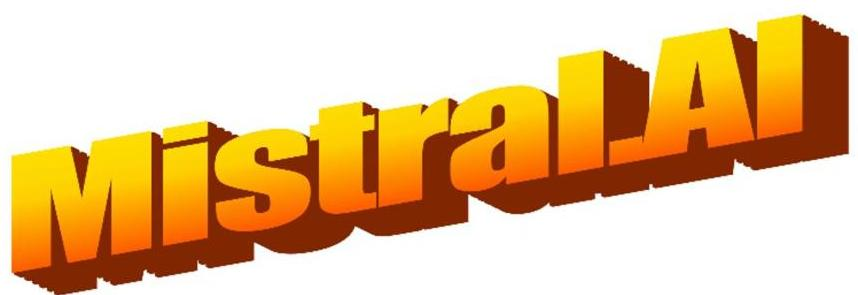](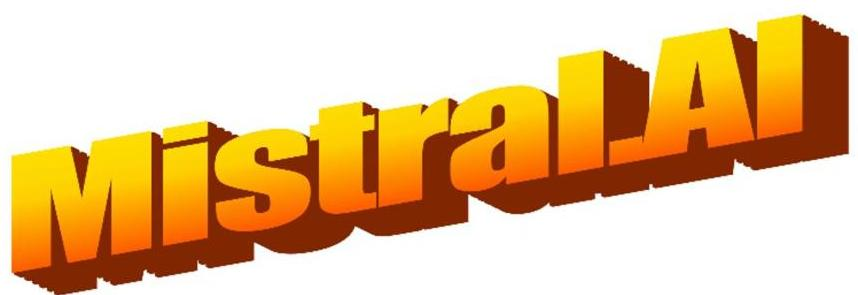)

We introduce Pixtral 12B, a 12-billion-parameter multimodal language model. Pixtral 12B is trained to understand both natural images and documents, achieving leading performance on various multimodal benchmarks, surpassing a number of larger models. Unlike many open-source models, Pixtral is also a cutting-edge text model for its size, and does not compromise on natural language performance to excel in multimodal tasks. Pixtral uses a new vision encoder trained from scratch, which allows it to ingest images at their natural resolution and aspect ratio. This gives users flexibility on the number of tokens used to process an image. Pixtral is also able to process any number of images in its long context window of 128 K tokens. Pixtral 12B substanially outperforms other open models of similar sizes (Llama-3.2 11B \& Qwen-2-VL 7B). It also outperforms much larger open models like Llama-3.2 90B while being 7x smaller. We further contribute an open-source benchmark, MM-MT-Bench, for evaluating vision-language models in practical scenarios, and provide detailed analysis and code for standardized evaluation protocols for multimodal LLMs. Pixtral 12B is released under Apache 2.0 license.

Webpage: https://mistral.ai/news/pixtral-12b/
Inference code: https://github.com/mistralai/mistral-inference/
Evaluation code: https://github.com/mistralai/mistral-evals/

## 1 Introduction

This paper describes Pixtral 12B, a multimodal language model trained to understand both images and text, released with open weights under an Apache 2.0 license. Pixtral is an instruction tuned model which is pretrained on large scale interleaved image and text documents, and hence is capable of multi-turn, multi-image conversation.

Pixtral comes with a new vision encoder which is trained with a novel RoPE-2D implementation, allowing it to process images at their native resolution and aspect ratio. In this way, the model can flexibly process images at low resolution in latency-constrained settings, while processing images at high resolution when fine-grained reasoning is required.

When compared against models of a similar size in the same evaluation setting, we find that Pixtral delivers strong multimodal reasoning capabilities without sacrificing text-only reasoning performance.![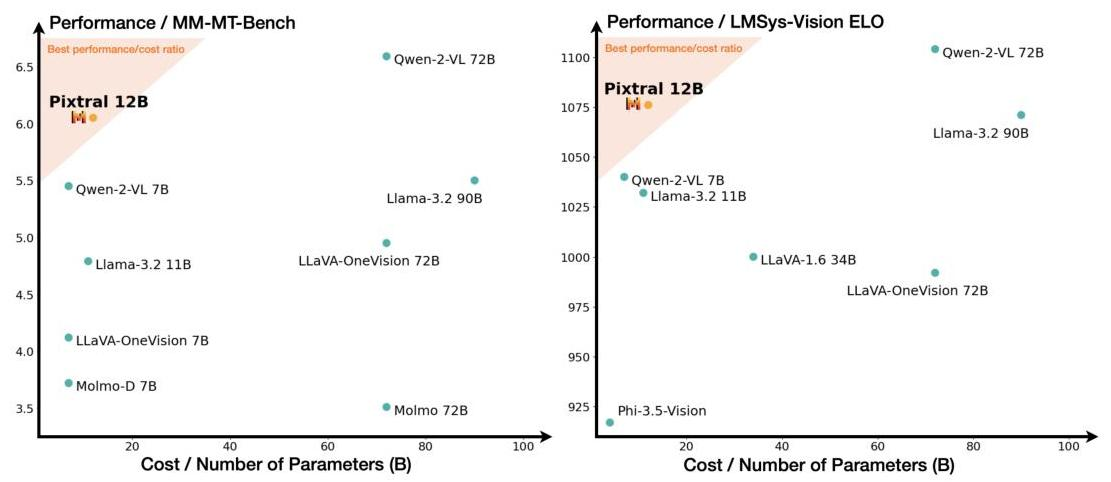](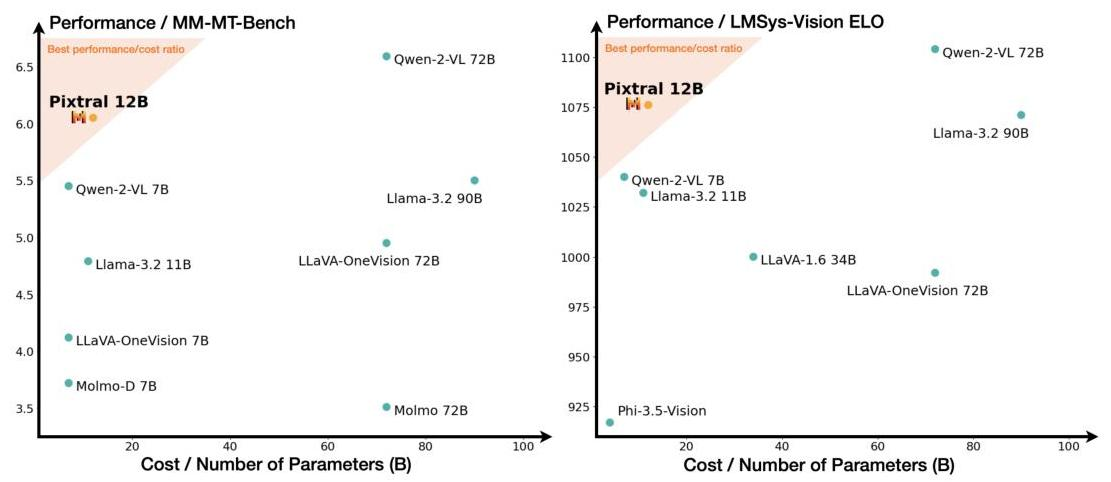)

Figure 1: Pixtral Performance. Pixtral outperforms all open-models within its weight class on multimodal tasks by a substantial margin. Left: Performance on MM-MT-Bench, a new multimodal, multiturn, instruction following benchmark designed to reflect real world usage of multimodal language models. Right: Performance on the public LMSys leaderboard (Vision arena, October 2024).

For instance, our model matches or exceeds the performance of models like Qwen2-VL 7B [23] and Llama-3.2 11B [6] on popular multimodal benchmarks like MMMU [24] and MathVista [14], while outperforming most open-source models on popular text-only tasks like MATH [7] and HumanEval [26]. Pixtral even outperforms much larger models like Llama-3.2 90B [6], as well as closed models such as Claude-3 Haiku [1] and Gemini-1.5 Flash 8B [18], on multimodal benchmarks.

During evaluation of Pixtral and the baselines, we found that evaluation protocols for multimodal language models is not standardized, and that small changes in the setup can dramatically change the performance of some models. We provide thorough analysis of our experience in re-evaluating vision-language models under a common evaluation protocol.

Specifically, we identify two issues with evaluation:

- Prompts: Several benchmarks have default prompts which are under-specified, and dramatically reduce the performance of leading closed source models $[16,1]$ compared to reported figures.
- Evaluation Metrics: The official metrics typically require exact match, which score model generations as correct only if they exactly match the reference answer. However, this metric penalizes answers which are substantively correct but in a slightly different format (e.g., "6.0" vs "6").

To alleviate these issues, we propose 'Explicit' prompts that explicitly specify the format required by the reference answer. We further analyze the impact of flexible parsing for various models, releasing the evaluation code and prompts in an effort to establish fair and standardized evaluation protocols ${ }^{1}$.

Moreover, while current multimodal benchmarks mostly evaluate short-form or multiple-choice question answering given an input image, they do not fully capture a model's utility for practical use cases (e.g. in a multi-turn, long-form assistant setting). To address this, we open-source a novel multimodal, multi-turn evaluation: MM-MT-Bench ${ }^{2}$. We find that performance on MM-MT-Bench correlates highly with ELO rankings on the LMSys Vision Leaderboard.
Pixtral excels at multimodal instruction following, surpassing comparable open-source models on the MM-MT-Bench benchmark (see Figure 1). Based on human preferences on the LMSys Vision Leaderboard, Pixtral 12B is currently the highest ranked Apache 2.0 model, substantially outperforming other open-models such Llama-3.2 11B [6] and Qwen2-VL 7B [23]. It even ranks higher than several closed models such as Claude-3 Opus \& Claude-3 Sonnet [1], and several larger models such as Llama-3.2 90B [6].

[^0]
[^0]:    ${ }^{1}$ https://github.com/mistralai/mistral-evals/
    ${ }^{2}$ https://huggingface.co/datasets/mistralai/MM-MT-Bench![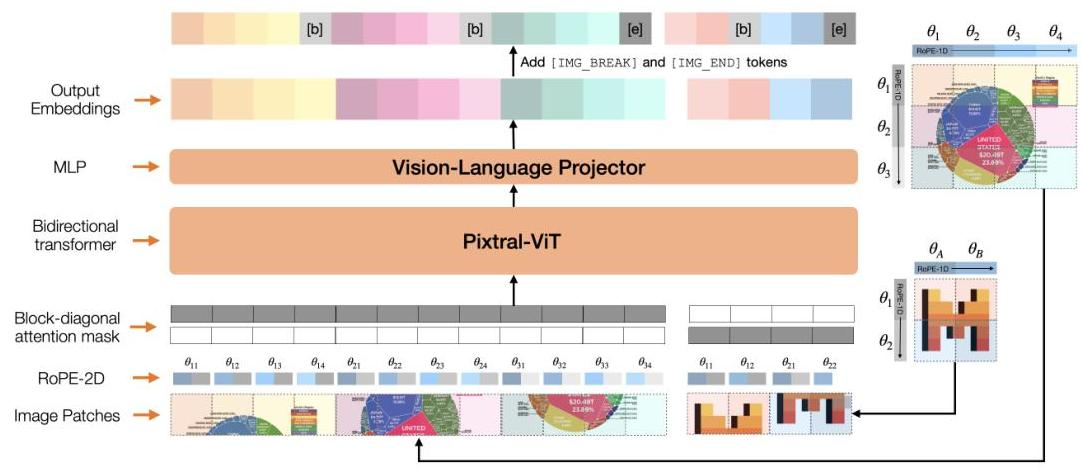](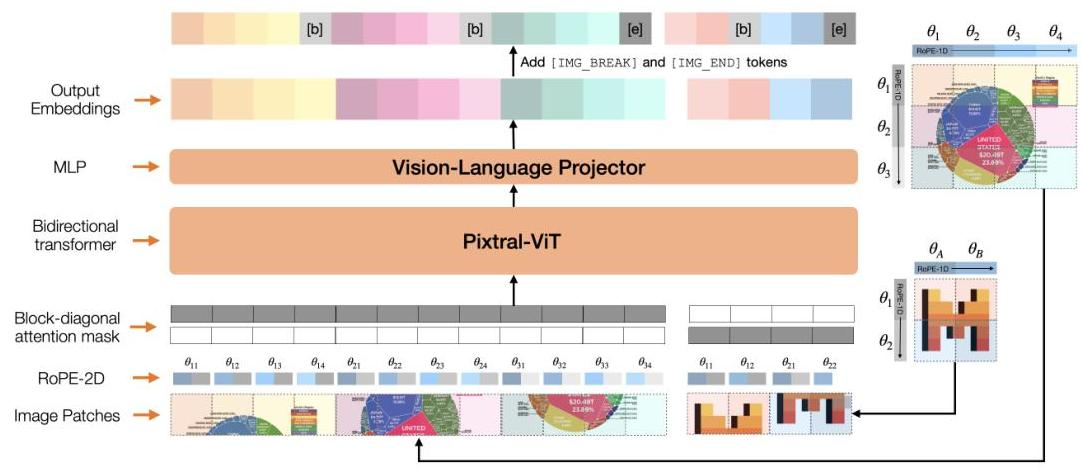)

Figure 2: Pixtral Vision Encoder. Pixtral uses a new vision encoder, which is trained from scratch to natively support variable image sizes and aspect ratios. Block-diagonal attention masks enable sequence packing for batching, while RoPE-2D encodings facilitate variable image sizes. Note that the attention mask and position encodings are fed to the vision transformer as additional input, and utilized only in the self-attention layers.

## 2 Architectural details

Pixtral 12B is based on the transformer architecture [22], and consists of a multimodal decoder to perform highlevel reasoning, and a vision encoder to allow the model to ingest images. The main parameters of the model are summarized in Table 1.

### 2.1 Multimodal Decoder

Pixtral 12B is built on top of Mistral Nemo 12B [15], a 12-billion parameter decoder-only language model that achieves strong performance across a range of knowledge and reasoning tasks.

| Parameters | Decoder | Encoder |
| :-- | --: | --: |
| dim | 5120 | 1024 |
| n_layers | 40 | 24 |
| head_dim | 128 | 64 |
| hidden_dim | 14336 | 4096 |
| n_heads | 32 | 16 |
| n_kv_heads | 8 | 16 |
| context_len | 131072 | 4096 |
| vocab_size | 131072 | - |
| patch_size | - | 16 |

Table 1: Decoder and encoder parameters.

### 2.2 Vision Encoder

In order for Pixtral 12B to ingest images, we train a new vision encoder from scratch, named PixtralViT. Here, our goal is to instantiate a simple architecture which is capable of processing images across a wide range of resolutions and aspect ratios. To do this, we build a 400 million parameter vision transformer [5] (see Table 1) and make four key changes over the standard architectures [17]:

Break tokens: In order to assist the model in distinguishing between images with the same number of patches (same area) but different aspect ratios, we include [IMAGE BREAK] tokens between image rows [2]. We further include an [IMAGE END] token at the end of an image sequence.
Gating in FFN: Instead of standard feedforward layer in the attention block, we use gating in the hidden layer [19].
Sequence packing: In order to efficiently process images within a single batch, we flatten the images along the sequence dimension and concatenate them [3]. We construct a block-diagonal mask to ensure no attention leakage between patches from different images.
RoPE-2D: We replace traditional learned and absolute position embeddings for image patches with relative, rotary position encodings [11, 20] in the self-attention layers. While learned position embeddings must be interpolated to deal with new image sizes (often at the cost of performance), relative position encodings lend themselves naturally to variable image sizes.

In [79]:
md = """"""
for page in ocr_response.pages:
  md += page.markdown
  for image in page.images:
    md = md.replace(image.id, image.image_base64)
display(Markdown(md))